Credits - https://github.com/bansalkanav/Machine_Learning_and_Deep_Learning

## Multiple Linear Regression

We will see how to do Multiple Linear Regression using the following approaches:

1. Build a Multiple Linear Regression Model using `statsmodels`
    - Load the data
    - Understanding the data (EDA)
    - Data Preparation (Train Test Split)
    - Use `statsmodel` on the data and train the Model
    - Manual Feature Selection based on p value and VIF - (Forward Feature Selection, Backward Feature Selection)
    - Resdual Analysis on Train Data
    - Prediction on Test Data
    - Evaluation - (RMSE, R_squared)
2. Build a MLR Model using `sklearn`
    - Load the data
    - Understanding the data (EDA)
    - Data Preparation (Train Test Split)
    - Use `sklearn` in order to train the model
    - Resdual Analysis on Train Data
    - Prediction on Test Data
    - Evaluation - (RMSE, R_squared)
3. Automatic Feature Selection using `RFE`

# 1. Build a Multiple Linear Regression Model using `statsmodels`

### Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

print(type(boston))

<class 'sklearn.utils.Bunch'>


### Understanding and Viz

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(boston.data)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [6]:
df['Price'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


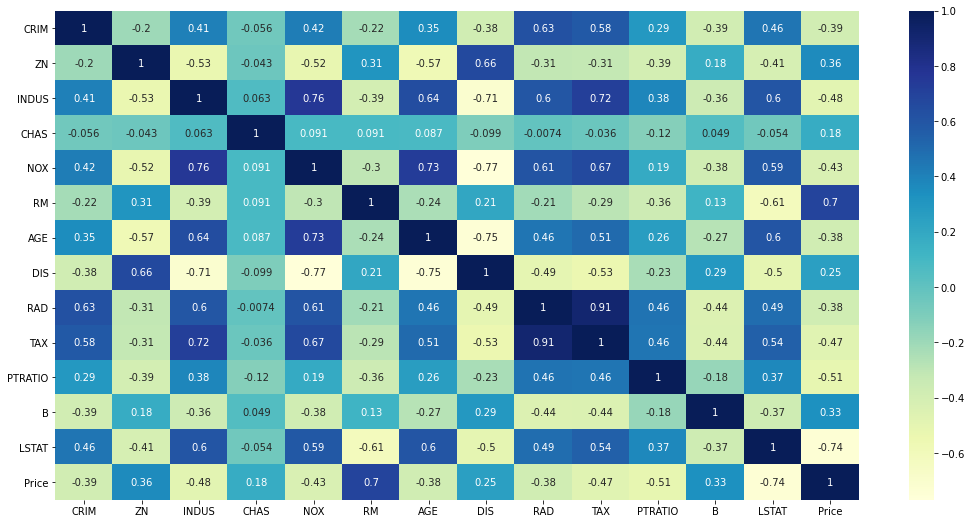

In [9]:
plt.figure(figsize=(18, 9))

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

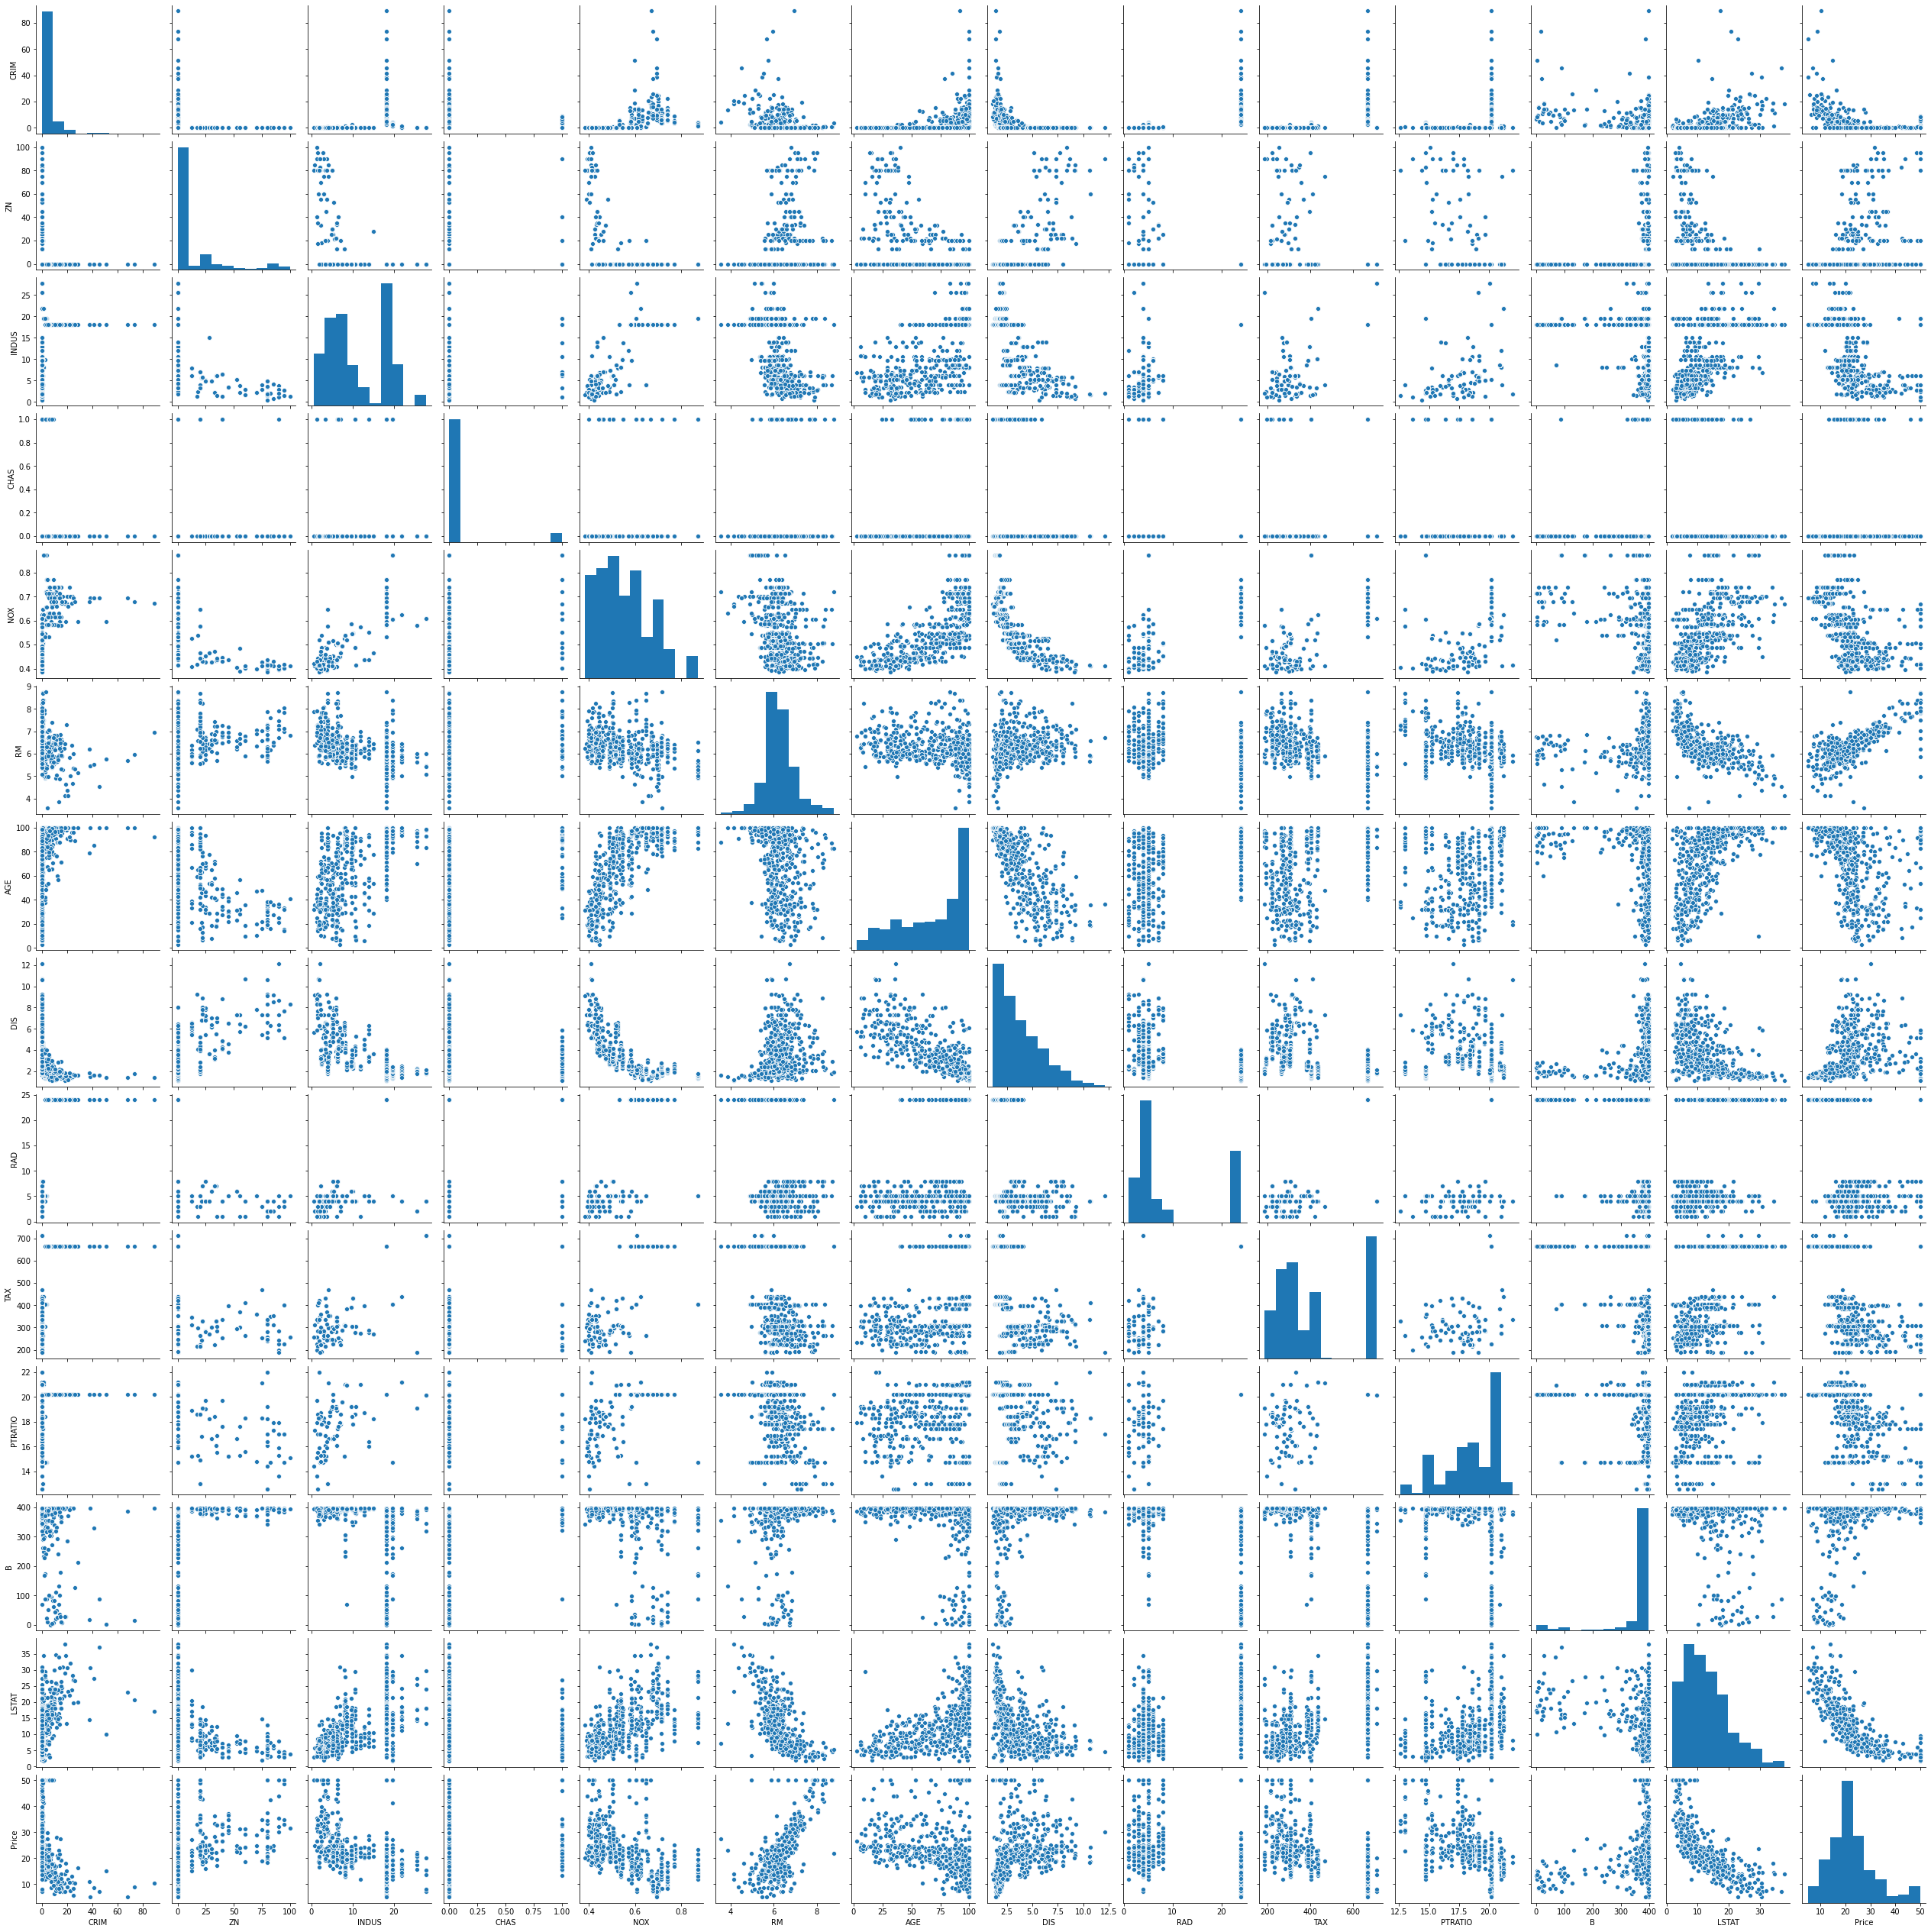

In [10]:
sns.pairplot(df)

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

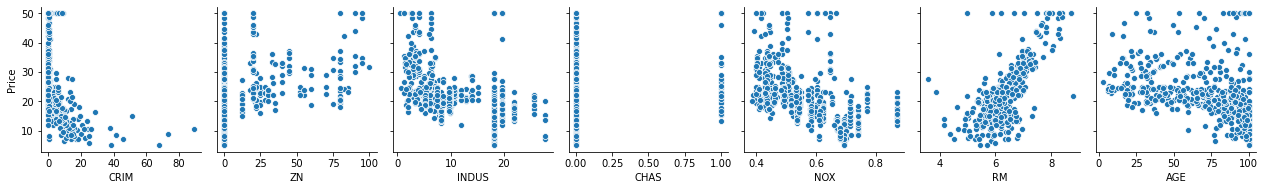

In [12]:
sns.pairplot(data = df,
            x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE'],
            y_vars = 'Price')

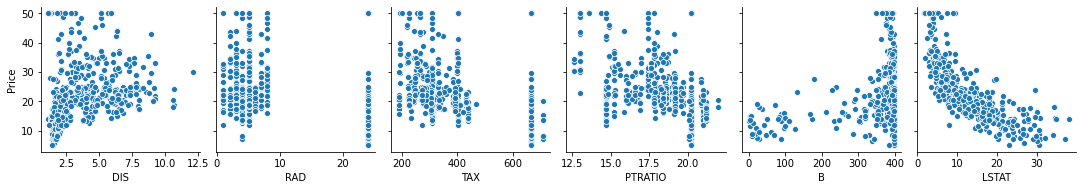

In [13]:
sns.pairplot(data = df,
            x_vars = ['DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
            y_vars = 'Price')

### Data Preparation

In [8]:
# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(404, 14)
(102, 14)


### Training

# Using `statsmodel`

In [9]:
y_train = df_train.pop('Price')
X_train = df_train

In [10]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


#### Forward Feature Selection -> 

In [11]:
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train[['RM']])

# Create a first model
lr = sm.OLS(y_train, X_train_sm).fit()

In [12]:
lr.params

const   -36.476190
RM        9.376384
dtype: float64

In [13]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     397.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           5.64e-62
Time:                        18:37:24   Log-Likelihood:                -1332.2
No. Observations:                 404   AIC:                             2668.
Df Residuals:                     402   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.4762      2.982    -12.231      0.000     -42.339     -30.613
RM             9.3764      0.470     19.933      0.000       8.452      10.301
==============================================================================
Omnibus:                       66.615   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.894
Skew:                           0.458   Prob(JB):                    6.12e-100
Kurtosis:                       8.129   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

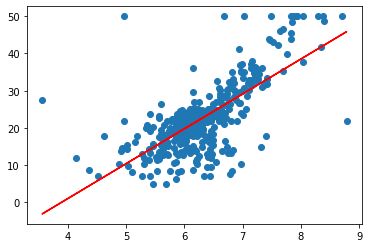

In [14]:
plt.scatter(X_train_sm.loc[:, 'RM'], y_train)

plt.plot(X_train_sm.loc[:, 'RM'], -36.476190 + 9.376384 * X_train_sm.loc[:, 'RM'], 'r')

plt.show()

In [15]:
# Add LSTAT to the data and try to rebuild the model

X_train_sm = sm.add_constant(X_train[['RM', 'LSTAT']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

In [16]:
lr.params

const   -1.262529
RM       5.109068
LSTAT   -0.654949
dtype: float64

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     392.5
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.83e-95
Time:                        18:37:25   Log-Likelihood:                -1252.0
No. Observations:                 404   AIC:                             2510.
Df Residuals:                     401   BIC:                             2522.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2625      3.513     -0.359      0.719      -8.168       5.643
RM             5.1091      0.492     10.379      0.000       4.141       6.077
LSTAT         -0.6549      0.047    -13.979      0.000      -0.747      -0.563
==============================================================================
Omnibus:                       88.171   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.848
Skew:                           1.088   Prob(JB):                     2.71e-46
Kurtosis:                       5.780   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Backward Feature Selection

In [18]:
# Lets add all the variables and see

X_train_sm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const      38.091695
CRIM       -0.119443
ZN          0.044780
INDUS       0.005485
CHAS        2.340804
NOX       -16.123604
RM          3.708709
AGE        -0.003121
DIS        -1.386397
RAD         0.244178
TAX        -0.010990
PTRATIO    -1.045921
B           0.008110
LSTAT      -0.492793
dtype: float64

In [19]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          9.64e-117
Time:                        18:37:26   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0917      5.522      6.898      0.000      27.234      48.949
CRIM          -0.1194      0.037     -3.257      0.001      -0.192      -0.047
ZN             0.0448      0.014      3.102      0.002       0.016       0.073
INDUS          0.0055      0.063      0.087      0.931      -0.119       0.130
CHAS           2.3408      0.902      2.595      0.010       0.567       4.115
NOX          -16.1236      4.212     -3.828      0.000     -24.404      -7.843
RM             3.7087      0.458      8.106      0.000       2.809       4.608
AGE           -0.0031      0.014     -0.218      0.828      -0.031       0.025
DIS           -1.3864      0.214     -6.480      0.000      -1.807      -0.966
RAD            0.2442      0.070      3.481      0.001       0.106       0.382
TAX           -0.0110      0.004     -2.819      0.005      -0.019      -0.003
PTRATIO       -1.0459      0.137     -7.636      0.000      -1.315      -0.777
B              0.0081      0.003      2.749      0.006       0.002       0.014
LSTAT         -0.4928      0.054     -9.086      0.000      -0.599      -0.386
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation**

Looking at the p-values of some of the variables(like `INDUS`, `AGE`), it is clear that they are not statistically significant.

Lets try to look at VIFs along with this to be sure before dropping any variable from the data.

### Variance Infllation Factor (VIF)

VIF estimates the inflation in regression coefficients due to multicollinearity. VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model. The numerical value for VIF gives what percentage of variance is inflated for each coefficient. As a thumb rule, VIF greater than 5.0 indicates a highly correlated variable. Therefore, those highly correlated variables must be removed for a good prediction model.

The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,CRIM,2.10
1,ZN,2.93
2,INDUS,13.94
3,CHAS,1.14
4,NOX,80.58
5,RM,81.17
6,AGE,22.84
7,DIS,14.80
8,RAD,14.92
9,TAX,58.05


In [22]:
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,PTRATIO,87.89
5,RM,81.17
4,NOX,80.58
9,TAX,58.05
6,AGE,22.84
11,B,21.83
8,RAD,14.92
7,DIS,14.80
2,INDUS,13.94
12,LSTAT,11.32


In [23]:
np.round(lr.pvalues, 3)

const      0.000
CRIM       0.001
ZN         0.002
INDUS      0.931
CHAS       0.010
NOX        0.000
RM         0.000
AGE        0.828
DIS        0.000
RAD        0.001
TAX        0.005
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64

In [25]:
X = X_train.copy()

In [26]:
X = X.drop('AGE', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const      0.000
CRIM       0.001
ZN         0.002
INDUS      0.928
CHAS       0.010
NOX        0.000
RM         0.000
DIS        0.000
RAD        0.001
TAX        0.005
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64
####################
   Features    VIF
9   PTRATIO  87.88
5        RM  78.24
4       NOX  73.45
8       TAX  58.04
10        B  21.69
7       RAD  14.89
2     INDUS  13.93
6       DIS  13.07
11    LSTAT   9.95
1        ZN   2.86
0      CRIM   2.10
3      CHAS   1.14


In [27]:
X = X.drop('INDUS', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const      0.000
CRIM       0.001
ZN         0.002
CHAS       0.009
NOX        0.000
RM         0.000
DIS        0.000
RAD        0.000
TAX        0.002
PTRATIO    0.000
B          0.006
LSTAT      0.000
dtype: float64
####################
   Features    VIF
8   PTRATIO  85.98
4        RM  74.88
3       NOX  67.90
7       TAX  45.96
9         B  21.63
6       RAD  13.44
5       DIS  12.09
10    LSTAT   9.92
1        ZN   2.84
0      CRIM   2.10
2      CHAS   1.13


In [28]:
X = X.drop('PTRATIO', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.004
CRIM     0.004
ZN       0.000
CHAS     0.003
NOX      0.057
RM       0.000
DIS      0.000
RAD      0.019
TAX      0.000
B        0.032
LSTAT    0.000
dtype: float64
####################
  Features    VIF
3      NOX  67.81
4       RM  59.15
7      TAX  42.73
8        B  19.83
6      RAD  13.44
5      DIS   9.69
9    LSTAT   8.62
1       ZN   2.36
0     CRIM   2.10
2     CHAS   1.12


In [29]:
X = X.drop('NOX', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.026
CRIM     0.006
ZN       0.000
CHAS     0.004
RM       0.000
DIS      0.000
RAD      0.025
TAX      0.000
B        0.021
LSTAT    0.000
dtype: float64
####################
  Features    VIF
6      TAX  37.30
3       RM  31.66
7        B  19.43
5      RAD  13.39
4      DIS   8.55
8    LSTAT   6.38
1       ZN   2.30
0     CRIM   2.08
2     CHAS   1.12


In [30]:
X = X.drop('TAX', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.599
CRIM     0.014
ZN       0.000
CHAS     0.001
RM       0.000
DIS      0.000
RAD      0.006
B        0.017
LSTAT    0.000
dtype: float64
####################
  Features    VIF
3       RM  27.01
6        B  19.02
4      DIS   8.43
7    LSTAT   5.15
5      RAD   4.38
1       ZN   2.30
0     CRIM   2.07
2     CHAS   1.11


In [33]:
X = X.drop('RM', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const    0.000
CRIM     0.065
ZN       0.000
CHAS     0.000
DIS      0.000
RAD      0.026
B        0.225
LSTAT    0.000
dtype: float64
####################
  Features   VIF
5        B  8.17
3      DIS  7.60
6    LSTAT  4.96
4      RAD  3.71
1       ZN  2.28
0     CRIM  2.07
2     CHAS  1.10


### Residual Analysis on Training Data

In [34]:
y_train_pred = lr.predict(X_train_sm)

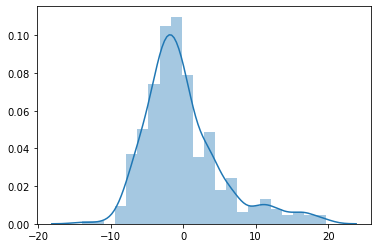

In [35]:
residual = y_train - y_train_pred

sns.distplot(residual)

### Making the Prediction

In [36]:
df_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [37]:
y_test = df_test.pop('Price')

X_test = df_test

In [38]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


In [39]:
X_train_sm.columns

Index(['const', 'CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT'], dtype='object')

In [40]:
cols = ['CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT']

X_test = X_test[cols]

In [41]:
X_test.head()

,CRIM,ZN,CHAS,DIS,RAD,B,LSTAT
329,0.06724,0.0,0.0,5.2146,4.0,375.21,7.34
371,9.23230,0.0,0.0,1.1691,24.0,366.15,9.53
219,0.11425,0.0,1.0,3.3633,5.0,393.74,10.50
403,24.80170,0.0,0.0,1.7028,24.0,396.90,19.77
78,0.05646,0.0,0.0,5.0141,5.0,386.40,12.34


In [42]:
X_test_sm = sm.add_constant(X_test)

In [43]:
X_test_sm.shape

(102, 8)

In [44]:
y_test_pred = lr.predict(X_test_sm)

In [45]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.5517349103281575
Mean Squared Error:  43.68120447086666
Root Mean Squared Error:  6.609175778481509


In [46]:
print(metrics.r2_score(y_test, y_test_pred))

0.46356328361321497


# 2. Building the MLR Model using `sklearn` 

In [47]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Residual Analysis on Training Data

In [49]:
y_train_pred = regressor.predict(X_train)

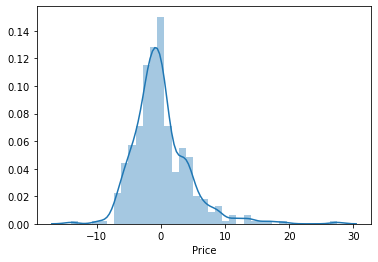

In [50]:
residual = y_train - y_train_pred

sns.distplot(residual)

### Making Prediction

In [53]:
X_test = df_test

In [54]:
y_test_pred = regressor.predict(X_test)

In [55]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
329,22.6,24.889638
371,50.0,23.721411
219,23.0,29.364999
403,8.3,12.122386
78,21.2,21.443823
...,...,...
56,24.7,25.442171
455,14.1,15.571783
60,18.7,17.937195
213,28.1,25.305888


### Evaluation

In [56]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3.8429092204445046
Mean Squared Error:  33.448979997676524
Root Mean Squared Error:  5.783509315085134


In [57]:
print(metrics.r2_score(y_test, y_test_pred))

0.589222384918251


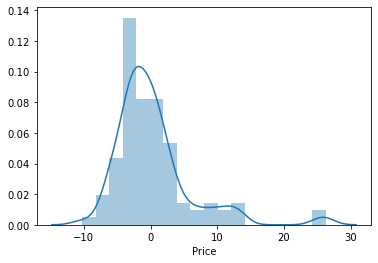

In [58]:
residual_test = y_test - y_test_pred

sns.distplot(residual_test)

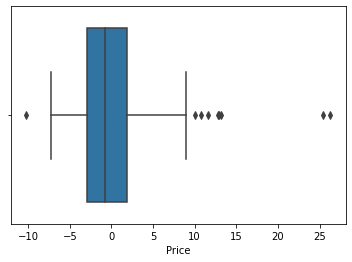

In [59]:
sns.boxplot(residual_test)

## 3. Automatic Feature Selection (RFE - Recursive Feature Elimination)

In [60]:
from sklearn.linear_model import LinearRegression
regressor_temp = LinearRegression()

In [61]:
from sklearn.feature_selection import RFE

rfe = RFE(regressor_temp, 7)

rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [62]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df

,Columns,Included,Ranking
0,CRIM,True,1
1,ZN,False,3
2,INDUS,False,6
3,CHAS,True,1
4,NOX,True,1
5,RM,True,1
6,AGE,False,7
7,DIS,True,1
8,RAD,False,2
9,TAX,False,4


In [63]:
imp_col = X_train.columns[rfe.support_]

imp_col

Index(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [64]:
X_train_new = df_train[imp_col]

X_train_new.head()

,CRIM,CHAS,NOX,RM,DIS,PTRATIO,LSTAT
220,0.35809,1.0,0.507,6.951,2.8617,17.4,9.71
71,0.15876,0.0,0.413,5.961,5.2873,19.2,9.88
240,0.11329,0.0,0.428,6.897,6.3361,16.6,11.38
6,0.08829,0.0,0.524,6.012,5.5605,15.2,12.43
417,25.94060,0.0,0.679,5.304,1.6475,20.2,26.64


In [65]:
from sklearn.linear_model import LinearRegression
regressor_new = LinearRegression()
regressor_new.fit(X_train_new, y_train)

LinearRegression()

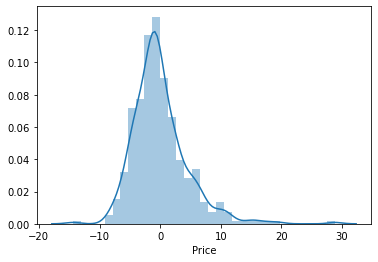

In [66]:
y_train_pred_new = regressor_new.predict(X_train_new)

residual = y_train - y_train_pred_new

sns.distplot(residual)

In [67]:
X_test_new = df_test[imp_col]

y_test_pred_new = regressor_new.predict(X_test_new)

In [68]:
temp_df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_new})
temp_df_new

,Actual,Predicted
329,22.6,27.565362
371,50.0,22.721940
219,23.0,29.759904
403,8.3,10.920656
78,21.2,23.120891
...,...,...
56,24.7,24.874779
455,14.1,17.040353
60,18.7,16.976280
213,28.1,25.565831


In [69]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_new))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_new))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_new)))

Mean Absolute Error:  4.107023542900277
Mean Squared Error:  36.90657461458284
Root Mean Squared Error:  6.075078157076074


In [70]:
print(metrics.r2_score(y_test, y_test_pred_new))

0.5467606276165057


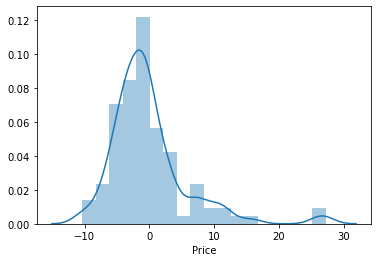

In [71]:
residual_test_new = y_test - y_test_pred_new

sns.distplot(residual_test_new)

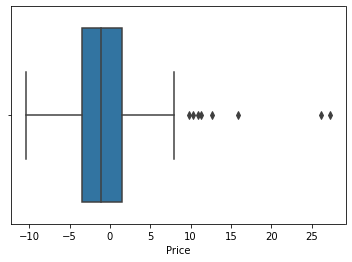

In [72]:
sns.boxplot(residual_test_new)

### Comparison of both the Models

In [73]:
res_df = pd.DataFrame({'res_test': residual_test, 'res_test_new': residual_test_new})

res_df.head()

,res_test,res_test_new
329,-2.289638,-4.965362
371,26.278589,27.278060
219,-6.364999,-6.759904
403,-3.822386,-2.620656
78,-0.243823,-1.920891


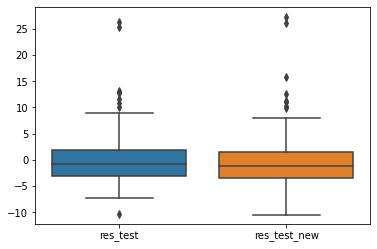

In [74]:
sns.boxplot(data = res_df)